In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [8]:
# explore measurement table with engine.execute
engine.execute("SELECT * FROM measurement LIMIT 10").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [9]:
# explore measurement table with pandas
conn = engine.connect()
data2 = pd.read_sql('SELECT * FROM measurement', conn)
data2.head(10)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [10]:
# explore station table
engine.execute("SELECT * FROM station LIMIT 10").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [11]:
# explore station data with pandas
data4 = pd.read_sql('SELECT * FROM station', conn)
data4.head(10)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [12]:
#double check class created.  Returns dictionary of schema
Base.metadata.tables

immutabledict({'measurement': Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None), 'station': Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)})

In [13]:
# use inspector to get columns for measurement and station table.
# inspector works with the sqlite tables (measurement, station) instead of the base class that reflects the tables (Measurement, Station)

from sqlalchemy import inspect
inspector  = inspect(engine)
inspector.get_table_names()

print('Columns for measurement table')
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])
    
    
print(' ')
print('Columns for station table')
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

Columns for measurement table
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
 
Columns for station table
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


## Precipitation Analysis

max date is 2017-08-23
<class 'datetime.date'>


<Figure size 432x288 with 0 Axes>

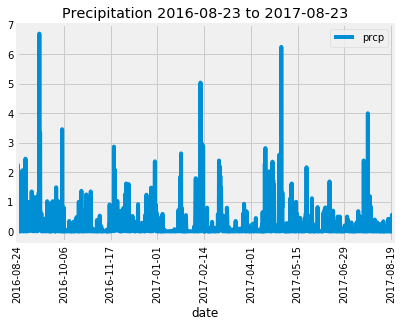

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Querying the Base tables returns results in a list
# Calculate the date 1 year ago from the last data point in the database

max_date = session.query(func.max(Measurement.date)).all()
#max_date is returned as a tuple in a list.  Get the first position of the list and and first position of the tuple
max_date = max_date[0][0]       #type is string
print(f'max date is {max_date}')   #2017-08-23
#min_date = '2016-08-23'

#get 1 year ago date.  Got code with Shazee's help
today = dt.date.today()
max_temp = today.replace(year=int(max_date[:4]),month=int(max_date[5:7]),day=int(max_date[8:]))
min_date = max_temp - dt.timedelta(days=365)


print(type(min_date))
# Perform a query to retrieve the date and precipitation scores
prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > min_date).\
                                              filter(Measurement.date < max_date).all() 
# for i in prcp:
#     print(i.date, i.prcp)

# Save the query results as a Pandas DataFrame
prcp_df = pd.DataFrame(prcp)
prcp_df.head()
prcp_df.shape

#add column header to dataframe
prcp_df.columns = ['date', 'prcp']

#reset index to date column
prcp_df = prcp_df.set_index('date')

#drop nans
prcp_df = prcp_df.dropna(how = 'any')

# Sort the dataframe by date
prcp_df = prcp_df.sort_index(ascending = True)
prcp_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure()
prcp_df.plot(title = f'Precipitation {min_date} to {max_date}', rot = 90)
plt.savefig('Output/prcp_plot.png')
plt.show()

In [ ]:
# convert rows in prcp into a list of dictionaries for app.py

# I get an error when I use __dict__, using ._asdict() instead
prcp_dict_list = []    
for row in prcp:
    i = (row._asdict())
    prcp_dict_list.append(i)
    
print(prcp_dict_list)   

![precipitation](Images/precipitation.png)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

![describe](Images/describe.png)

## Station Analysis

In [ ]:
# Design a query to show how many stations are available in this dataset?

num_of_stations = session.query(Measurement.station).group_by(Measurement.station).count()
print(f'Total number of stations is {num_of_stations}')

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# Option 1
# this is a list of stations and observations counts in descending order,  results is a list of tuples
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
                                                   group_by(Measurement.station).\
                                                   order_by(func.count(Measurement.station).desc()).\
                                                   all()

# Option2
# This import allows us to order by descending order on an aggregate value that's been labeled 'count_stations'
# https://docs.sqlalchemy.org/en/13/core/sqlelement.html#sqlalchemy.sql.expression.desc
from sqlalchemy import desc

station_count = session.query(Measurement.station, func.count(Measurement.station).label('count_stations')).\
                                                   group_by(Measurement.station).\
                                                   order_by(desc('count_stations')).\
                                                   all()

#print a list of stations and observation counts in descending order:
print('Here is a list of stations and observation counts in descending order')
for station in station_count:
    print(station)

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
top_station = session.query(Measurement.station, func.count(Measurement.station).label('count_stations')).\
                                                   group_by(Measurement.station).\
                                                   order_by(desc('count_stations')).\
                                                   first()

print(f'The top station is {top_station[0]} and it has {top_station[1]} rows')

# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(Measurement.station, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
              group_by(Measurement.station).\
              filter(Measurement.station == top_station[0]).all()

In [ ]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
#Filter by the station with the highest number of observations.

top_station = top_station[0]

top_station_tobs = session.query(Measurement.tobs).filter(Measurement.station == top_station).\
                                                                     filter(Measurement.date > min_date).\
                                                                     filter(Measurement.date < max_date).all()  
print(top_station_tobs)

In [ ]:
# get tob values out of a list-of-tuples and into a list-of-values

# option 1 - use np.ravel
top_station_tobs_list = list(np.ravel(top_station_tobs))
print(top_station_tobs_list)

# option 2 - use list comprehension to get the first value of tuples for precipitation
top_station_tobs_list =[precipitation[0] for precipitation in top_station_tobs]
print(top_station_tobs_list)

In [ ]:
#Plot the results as a histogram with 12 bins
plt.hist(top_station_tobs_list, bins=12)
plt.legend(labels='tobs')
plt.tight_layout()

## Temp (tmin, tavg, tmax) for a given start date

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps_start_only(start_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).all()

# function usage example
print(calc_temps_start_only('2012-02-28'))


## Temp (tmin, tavg, tmax) for a given start date and end date

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2011-02-28', '2011-03-05'))

In [ ]:
# Design a query to show how many stations are available in this dataset?
#result is a list of tuples
#get first position of list and first position of tuple
station_count = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(Measurement.station).all()
print(station_count)

#station_count = session.query(Measurement.station).distinct()
#Session.query(Table.column).distinct():
#print(station_count)

In [ ]:

#bonus - blotbar with y error bar
test = calc_temps('2011-02-28', '2011-03-05')
print(test)

temp_min = test[0][0]
y_axis = temp_avg = test[0][1]
temp_max = test[0][2]


print(temp_min)
print(temp_avg)
print(y_axis)
print(temp_max)

y_axis = temp_avg = test[0][1]
x_axis = [1]

# We apply align="edge" to ensure our bars line up with our tick marks

plt.ylim(0, 100)
plt.xlim(0, 1)
plt.bar(x_axis, y_axis, color='r', alpha=0.5)
#plt.plot(1, y_axis, align = "center")
plt.tight_layout()


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 

station_count = session.query(Measurement.station, func.count(Measurement.station).
                                                    label('count_stations')).\     #lable the aggregate value to sort on it
                                                    group_by(Measurement.station).\
                                                    order_by('count_stations').\    #sort by the aggregate value
                                                    all()
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
